## Задание №1

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Шаг 1: Прочитать файл
df = pd.read_csv('../data_in/marketing_mix.csv')

In [23]:
# Шаг 2: Приведение даты к формату '2024-01-01'
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

In [24]:
# 3. Преобразование в формат 'Дата', 'Источник', 'Доход'
melted_df = df.melt(
    id_vars =  ['Date'], var_name = 'Source', value_name = 'Income'
)

In [25]:
# 3. Удаление дубликатов
melted_df.drop_duplicates(
    subset = ['Date', 'Source'], inplace = True
)

In [26]:
# 4. Добавление столбца 'OS'
melted_df['OS'] = 'WEB'  # Устанавливаем значение по умолчанию
melted_df['OS'] = melted_df['OS'].where(~melted_df['Source'].isin(['TikTok', 'Facebook']), 'Android')
melted_df['OS'] = melted_df['OS'].where(~(melted_df['Source'] == 'Google Ads'), 'IOS')

In [27]:
# 5. Создание сводной таблицы: Динамика дохода по источникам по годам
melted_df['Year'] = pd.to_datetime(melted_df['Date']).dt.year
pivot_table = melted_df.pivot_table(index='Year', columns='Source', values='Income', aggfunc='sum', fill_value=0)

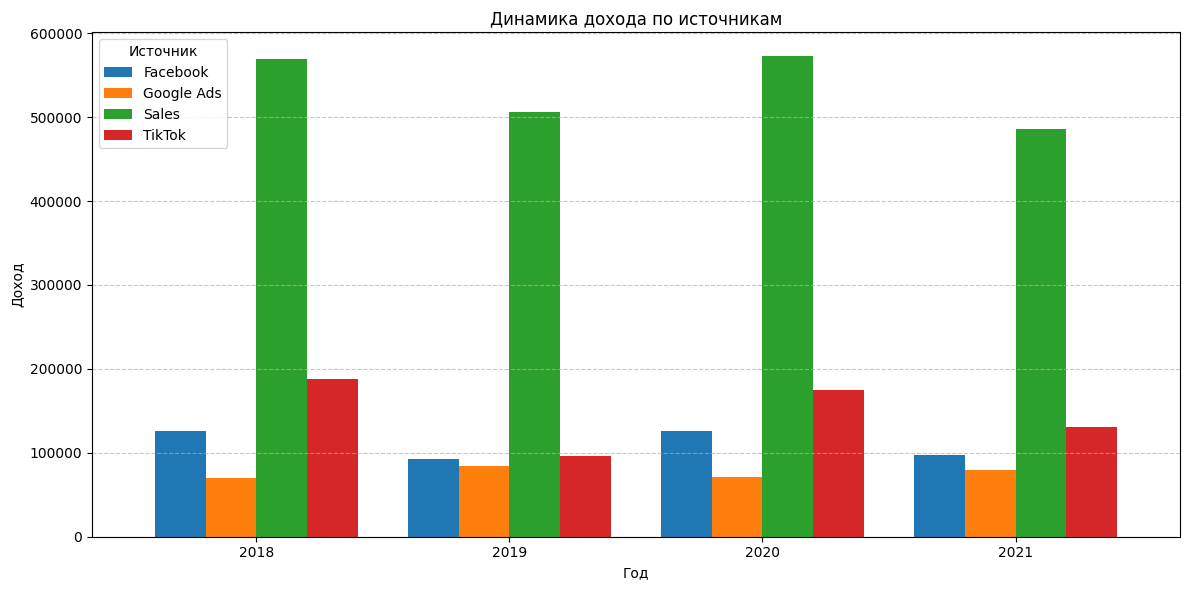

In [28]:
# 7. Визуализация данных
pivot_table.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Динамика дохода по источникам')
plt.xlabel('Год')
plt.ylabel('Доход')
plt.xticks(rotation=0)  # Убираем наклон оси X
plt.legend(title='Источник')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Сохранение графика
plt.tight_layout()
plt.savefig('../data_out/income_by_source_bar_chart.png')
plt.show()

pivot_table

In [29]:
# 6. Экспорт в Excel
output_file = '../data_out/income_by_source.xlsx'
pivot_table.to_excel(output_file)